## Dataset: Great Expectations by Dickens

In this notebook, dataset is created out of Great Expectations by Dickens text book. Then, it is analyzed: we are interested in either characters and words distributions, used to train different models, respectively. The goal of the analysis is to give some highlights about how to split the text in these settings, in order to retrieve the best results possible.

### Gutenberg notes and index

The given text, legally downloaded from Project Gutenberg, contains external legal notes either at the beginning and at the end of it. Moreover, index and chapter title are present. All these parts in the text represent just noise with respect to author writing, so they have been discarded as follows:
* Lines from 20427 to the end contain legal notes, so have been removed
* Lines from 0 to 106 contain either legal notes and index, so have been removed
* Chapter titles, formatted as "Chapter III." have been removed, too

### Paragraphs

Paragraph are the biggest text elements in which the text can be splitted. Since newlines contained inside the sentence have been removed (as well as special charachters and numbers), only multiple newlines are kept, but substituted with single newlines. Therefore, paragraphs can be found by splitting single newlines characters.

In [1]:
# Dependencies
from src.embeddings import Glove, plot_embeddings
from src.dataset.dickens import DickensGE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize numpy random generator
np.random.seed(42)

# Setup pandas
pd.set_option('display.max_columns', None)

# Setup plotting method
%matplotlib inline

In [2]:
# Load dataset from file
dataset = DickensGE.from_file(path='./data/great-expectations-dickens.txt')

# Show dataset length
print('Great Expectations by Dickens dataset contains {:d} paragraphs'.format(len(dataset)))

Great Expectations by Dickens dataset contains 3907 paragraphs


In [3]:
# Show three paragraphs at random
print('Some paragraphs:')
print()

# Loop in 3 paragraphs sampled at random
for i in np.random.choice(len(dataset), 3):
    # Print current paragraph
    print('{:d}-th paragraph:'.format(i + 1))
    print(dataset[i])
    print()

Some paragraphs:

3175-th paragraph:
putting miss havisham's note in my pocket, that it might serve as my credentials for so soon reappearing at satis house, in case her waywardness should lead her to express any surprise at seeing me, i went down again by the coach next day. but i alighted at the halfway house, and breakfasted there, and walked the rest of the distance for i sought to get into the town quietly by the unfrequented ways, and to leave it in the same manner.


3508-th paragraph:
at that time, the steam traffic on the thames was far below its present extent, and watermen's boats were far more numerous. of barges, sailing colliers, and coasting traders, there were perhaps, as many as now but of steam ships, great and small, not a tithe or a twentieth part so many. early as it was, there were plenty of scullers going here and there that morning, and plenty of barges dropping down with the tide the navigation of the river between bridges, in an open boat, was a much easier an

### Characters

In this section, the paragraph lengths in term of characters number are checked.

In [4]:
# Initialize alphabet
alphabet = set()

# Define character splitter
split_fn = dataset.split_chars

# Split paragraphs into characters
paragraphs = list(map(split_fn, dataset))
# Loop through each paragraph
for i in range(len(paragraphs)):
    # Retrieve set of characters
    chars = set(paragraphs[i])
    # Update alphabet
    alphabet |= chars

In [5]:
# Show all available characters

# Make characters dataframe
pd.DataFrame(
    # Make single row
    data=[[c for c in alphabet]],
    # Define columns
    columns=range(1, len(alphabet) + 1)
)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,"""",!,q,f,t,m,',r,c,p,y,",",j,b,i,d,w,s,l,.,a,\n,h,n,x,u,o,v,,k,e,?,z,g


In [6]:
# Plot character frequencies

# Intialize dictionary mapping character to its count
char_count = dict()
# Loop through each paragraph
for i, paragraph in enumerate(paragraphs):
    # Loop through each character in paragraph
    for j, char in enumerate(paragraph):
        # Increase current character counter
        char_count[char] = char_count.get(char, 0) + 1

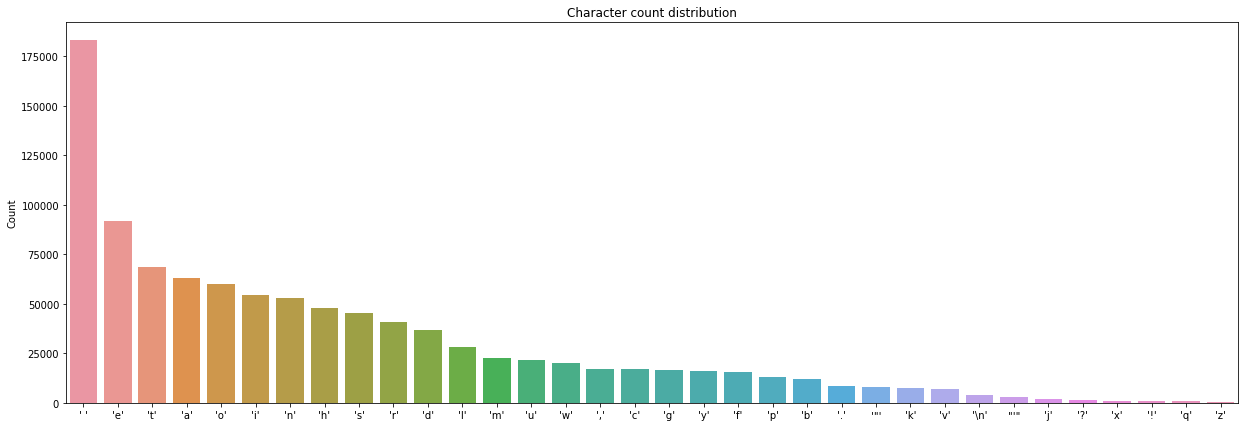

In [7]:
# Plot characters frequencies

# Define list of characters, sorted by count
chars = sorted(char_count, key=char_count.get, reverse=True)
# Define x axis (words)
x = [repr(char) for char in chars]
# Define y axis (counts)
y = [char_count[char] for char in chars]

# Intialize plot
fig, ax = plt.subplots(1, 1, figsize=(21, 7))
# Plot 20 most frequent words barplot
sns.barplot(x=x, y=y, ax=ax)
# Add title and labels
ax.set_title('Character count distribution')
ax.set_xlabel(None)
ax.set_ylabel('Count')
# Save plot
plt.savefig('images/chars_dist.png')
# Show plot
plt.show()

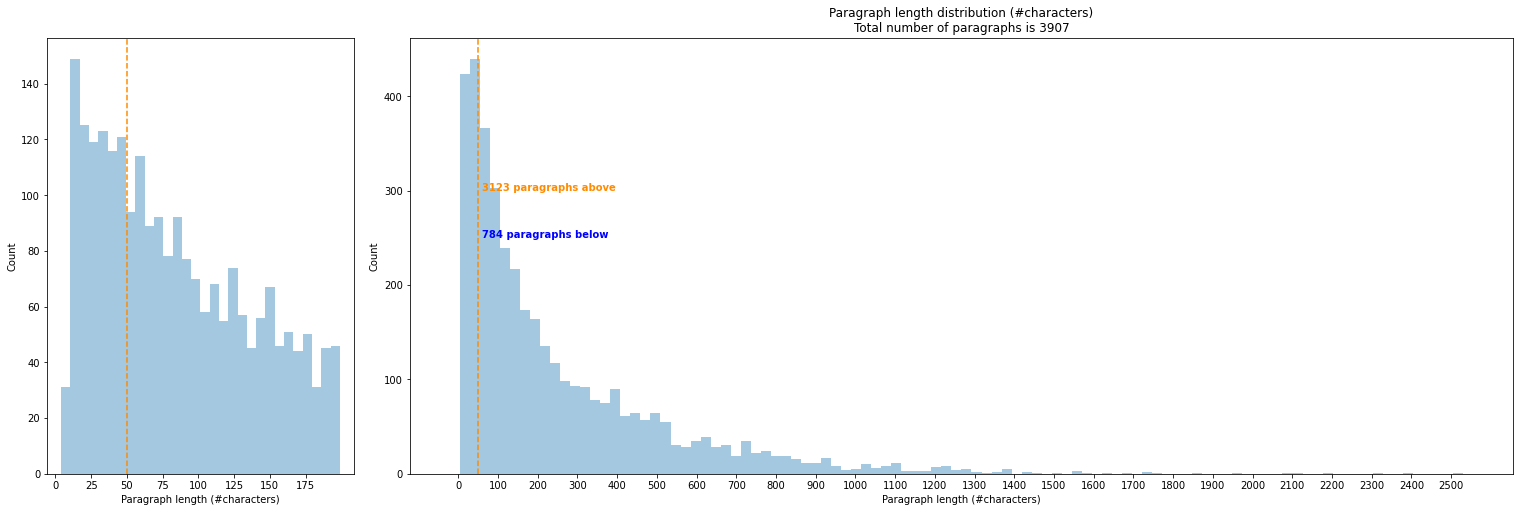

In [8]:
# Show sentences length distribution

# Define sentences length
x = np.array(list(map(len, paragraphs)))

# Initialize plot
fig = plt.figure(constrained_layout=True, figsize=(21, 7))
# Add custom grid
gs = fig.add_gridspec(1, 3)
# Define figure axis
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1:])

# Make distribution plot
sns.distplot(x[x < 200], bins=30, norm_hist=False, kde=False, ax=ax0)
# Add vertical line on minimum sequence length
ax0.axvline(x=50, c='darkorange', ls='--')
# Set x ticks
ax0.set_xticks(range(0, 200, 25))
# Set title and labels
ax0.set_xlabel('Paragraph length (#characters)')
ax0.set_ylabel('Count')

# Make distribution plot
sns.distplot(x, bins=100, norm_hist=False, kde=False, ax=ax1)
# Add vertical line on minimum sequence length
ax1.axvline(x=50, c='darkorange', ls='--')
# Add vertical text
ax1.annotate(xy=(50 + 10, 300), c='darkorange', weight='bold',
             s='{:d} paragraphs above'.format(sum(x >= 50)))
# Add vertical text
ax1.annotate(xy=(50 + 10, 300 - 50), c='blue', weight='bold',
             s='{:d} paragraphs below'.format(sum(x < 50)))
# Set x ticks
ax1.set_xticks(range(0, max(x), 100))
# Set title and labels
ax1.set_title('Paragraph length distribution (#characters)\n' +
             'Total number of paragraphs is {:d}'.format(len(x)))
ax1.set_xlabel('Paragraph length (#characters)')
ax1.set_ylabel('Count')
# Save plot
plt.savefig('images/chars_paragraphs.png')
# Show plot
plt.show()

### Words

In this section, paragraphs lengths are checked with respect to the number of words, instead.

In [9]:
# Define character splitter
split_fn = dataset.split_words

# Split paragraphs into characters
paragraphs = list(map(split_fn, dataset))
# Show some paragraphs
print('Some splitted paragraphs:', end='\n\n')
# Loop through each paragraph
for i in np.random.choice(len(paragraphs), 3):
    # Print current paragraph index
    print('{:d}-th paragraph:'.format(i))
    # Print current paragraph
    print(paragraphs[i])
    print()

Some splitted paragraphs:

1294-th paragraph:
['this', 'is', 'the', 'end', 'of', 'the', 'first', 'stage', 'of', 'pip', "'s", 'expectations', '.', '\n']

1130-th paragraph:
['i', 'said', 'glancing', 'at', 'joe', ',', 'who', 'stood', 'looking', 'on', ',', 'motionless', ',', 'that', 'i', 'supposed', 'i', 'could', 'come', 'directly', '.', '\n']

1095-th paragraph:
['"', 'now', ',', 'joseph', 'gargery', ',', 'i', 'am', 'the', 'bearer', 'of', 'an', 'offer', 'to', 'relieve', 'you', 'of', 'this', 'young', 'fellow', 'your', 'apprentice', '.', 'you', 'would', 'not', 'object', 'to', 'cancel', 'his', 'indentures', 'at', 'his', 'request', 'and', 'for', 'his', 'good', '?', 'you', 'would', 'want', 'nothing', 'for', 'so', 'doing', '?', '"', '\n']



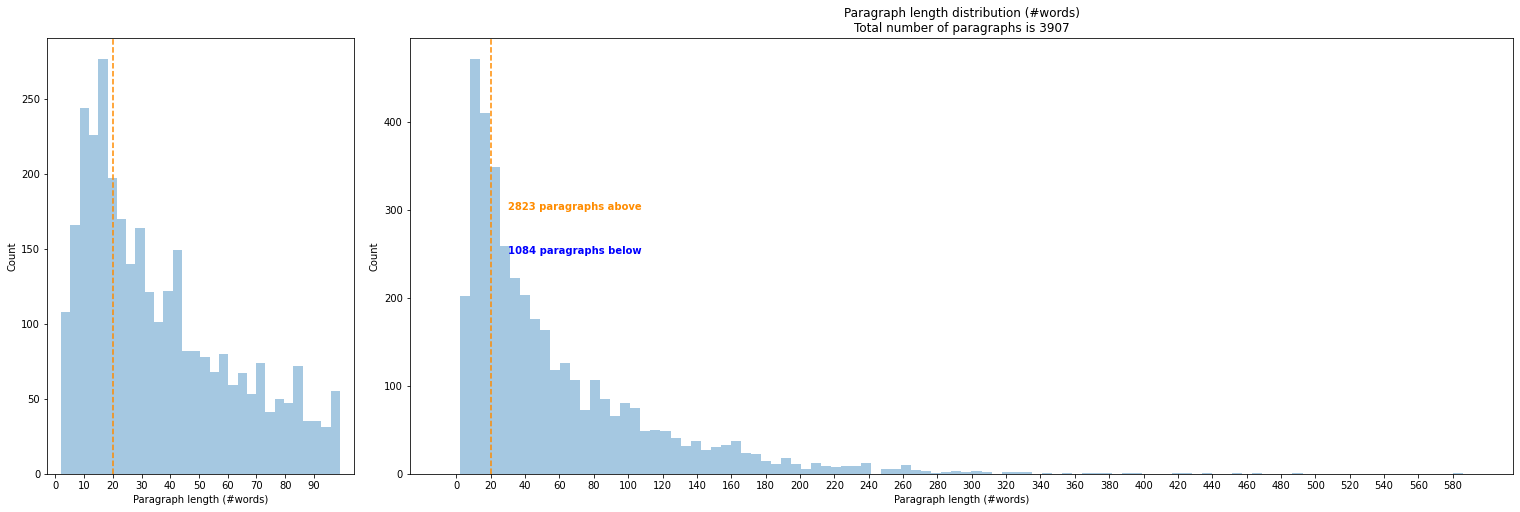

In [10]:
# Show sentences length distribution

# Define sentences length
x = np.array(list(map(len, paragraphs)))

# Initialize plot
fig = plt.figure(constrained_layout=True, figsize=(21, 7))
# Add custom grid
gs = fig.add_gridspec(1, 3)
# Define figure axis
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1:])

# Make distribution plot
sns.distplot(x[x < 100], bins=30, norm_hist=False, kde=False, ax=ax0)
# Add vertical line on minimum sequence length
ax0.axvline(x=20, c='darkorange', ls='--')
# Set x ticks
ax0.set_xticks(range(0, 100, 10))
# Set title and labels
ax0.set_xlabel('Paragraph length (#words)')
ax0.set_ylabel('Count')

# Make distribution plot
sns.distplot(x, bins=100, norm_hist=False, kde=False, ax=ax1)
# Add vertical line on minimum sequence length
ax1.axvline(x=20, c='darkorange', ls='--')
# Set x ticks
ax1.set_xticks(range(0, max(x), 20))
# Add vertical text
ax1.annotate(xy=(20 + 10, 300), c='darkorange', weight='bold',
             s='{:d} paragraphs above'.format(sum(x >= 20)))
# Add vertical text
ax1.annotate(xy=(20 + 10, 300 - 50), c='blue', weight='bold',
             s='{:d} paragraphs below'.format(sum(x < 20)))
# Set title and labels
ax1.set_title('Paragraph length distribution (#words)\n' +
             'Total number of paragraphs is {:d}'.format(len(x)))
ax1.set_xlabel('Paragraph length (#words)')
ax1.set_ylabel('Count')
# Save plot
plt.savefig('images/words_paragraphs.png')
# Show plot
plt.show()

In [11]:
# Compute words frequency

# Initialize a dictionary mapping words to their count
word_count = dict()
# Loop through each paragraph
for i, paragraph in enumerate(paragraphs):
    # Loop through each word in current paragraph
    for j, word in enumerate(paragraph):
        # Add word to dictionary
        word_count[word] = word_count.get(word, 0) + 1

In [12]:
# Order words by frequency

# Sort frequency dictionary keys
words = sorted(word_count, key=word_count.get, reverse=True)
# Define number of words
n = len(words)

In [13]:
# Print three most and less frequent words

# Initialize message: show some words and their frequencies
msg = ['Words counts:']
msg += ['({:d}) "{:s}" with count {:d}'.format(i + 1, words[i], word_count[words[i]]) for i in range(0, 3)]
msg += ['...']
msg += ['({:d}) "{:s}" with count {:d}'.format(i + 1, words[i], word_count[words[i]]) for i in range(n-3, n)]
# Cast message to string
msg = '\n'.join(msg)
# Show message
print(msg)

Words counts:
(1) "," with count 17046
(2) "." with count 8581
(3) "the" with count 8145
...
(10804) "wanderer" with count 1
(10805) "incompatible" with count 1
(10806) "tranquil" with count 1


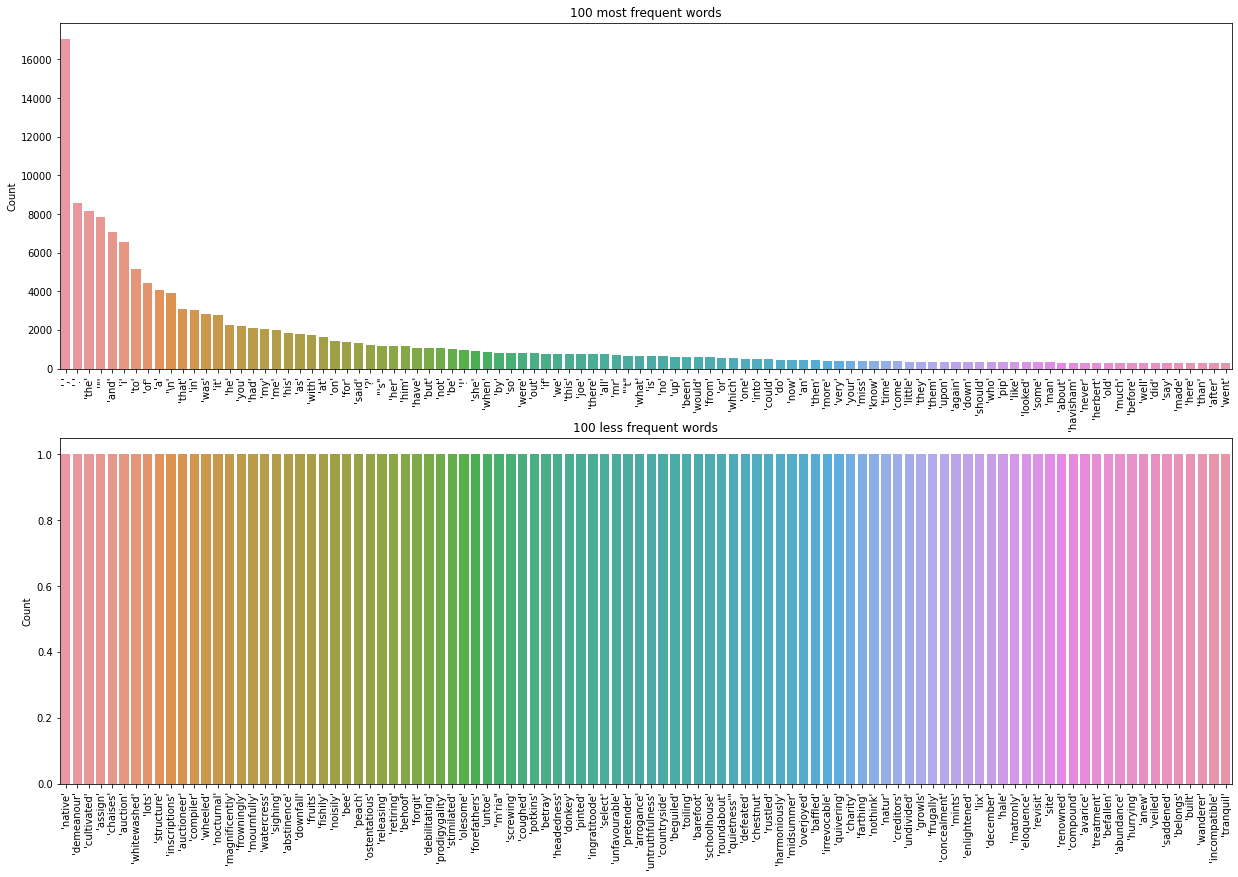

In [14]:
# Plot word frequencies

# Define number of words to select
k = 100
# Define most frequent words
most_freq = {repr(w): word_count[w] for w in words[:k]}
# Define less frequent words
less_freq = {repr(w): word_count[w] for w in words[-k:]}

# Intialize plot
fig, axs = plt.subplots(2, 1, figsize=(21, 14))
# Plot 20 most frequent words barplot
sns.barplot(x=[*most_freq.keys()], y=[*most_freq.values()], ax=axs[0])
# Add title and labels
axs[0].set_title('{:d} most frequent words'.format(k))
# axs[0].set_xlabel('Words')
axs[0].set_ylabel('Count')
# Set x axis ticks rotation
axs[0].tick_params(axis='x', rotation=90)
# Plot 20 less frequent words barplot
sns.barplot(x=[*less_freq.keys()], y=[*less_freq.values()], ax=axs[1])
# Add title and labels
axs[1].set_title('{:d} less frequent words'.format(k))
# axs[1].set_xlabel('Words')
axs[1].set_ylabel('Count')
# Set x axis ticks rotation
axs[1].tick_params(axis='x', rotation=90)
# Show plot
plt.show()

In [15]:
# tmp = 'says he, ‘Camilla'
# tmp = dataset.clean_text(tmp)
# tmp = dataset.split_words(tmp)
# tmp

### Embeddings

In [ ]:
# Load embeddings from glove, only for words in given list

# Retrieve glove dictionary
glove = Glove.from_file(path='data/glove.6B/glove.6B.100d.txt', words=words)

In [ ]:
# Plot words in glove vs words not in glove

# Define x and y axis
x = ['Included', 'Excluded']
y = [len(set(glove.keys())), len(set(words) - set(glove.keys()))]

# Initialize plot
fig, ax = plt.subplots(figsize=(7, 7))
# Make barplot
sns.barplot(x=x, y=y, ax=ax)
# Set plot tilte
ax.set_title('Number of words inside vs excluded by Glove dictionary')
ax.set_xlabel(None)
ax.set_ylabel('Number')
# Show plot
plt.show()

In [ ]:
# Plot feature values distribution

# Make plot
plot_embeddings(glove)